# Implementing LeNet-5
 As per http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
 
 with the help of Deep Learning for Vision Systems by Manning Publications

In [1]:
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt


In [21]:
print(tf.__version__)
print(np.__version__)

2.4.1
1.19.5


Initialize parameters

In [2]:
batch_size = 16
input_shape = (28, 28, 1)



# Load Data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_valid = x_train[1000:], x_train[:1000]
y_train, y_valid = y_train[1000:], y_train[:1000]

y_train = to_categorical(y_train, num_classes=10)
y_valid = to_categorical(y_valid,num_classes=10)
y_test = to_categorical(y_test, num_classes= 10)


In [4]:
x_train = tf.expand_dims(x_train, axis=-1)
x_valid = tf.expand_dims(x_valid,axis=-1)
x_test = tf.expand_dims(x_test, axis=-1)

In [5]:
print("train =", x_train.shape, y_train.shape)
print("valid =", x_valid.shape, y_valid.shape)
print("test =", x_test.shape, y_test.shape)

train = (59000, 28, 28, 1) (59000, 10)
valid = (1000, 28, 28, 1) (1000, 10)
test = (10000, 28, 28, 1) (10000, 10)


# Construct Model Lenet-5

In [6]:

def construct_lenet5_model(activation = 'tanh' ):
  '''
  Function to construct Lenet-5 model as deescribed in http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
  activation: Activation of the Conv2D filters values can be 'tanh' or 'relu' etc

  '''
  inputs = Input(shape=input_shape, batch_size = batch_size)

  C1 = Conv2D(filters= 6, kernel_size=5, strides = 1, padding='SAME', activation=activation, name='C1')(inputs)

  S2 = AveragePooling2D(pool_size=2, name='S2') (C1)

  C3 = Conv2D(filters= 16, kernel_size=5, strides = 1, padding='VALID', activation=activation, name='C3')(S2)

  S4 = AveragePooling2D(pool_size=2, name='S4')(C3)

  C5 = Conv2D(filters= 120, kernel_size=5, strides = 1, padding='VALID', activation=activation, name='C5')(S4)

  flatten = Flatten()(C5)

  FC6 = Dense(units=84, activation=activation)(flatten)

  output = Dense(units=10, activation='softmax')(FC6)

  model = Model(inputs = inputs, outputs = output)
  print(model.summary())
  return model




In [7]:
model = construct_lenet5_model()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[ 'accuracy'])


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(16, 28, 28, 1)]         0         
_________________________________________________________________
C1 (Conv2D)                  (16, 28, 28, 6)           156       
_________________________________________________________________
S2 (AveragePooling2D)        (16, 14, 14, 6)           0         
_________________________________________________________________
C3 (Conv2D)                  (16, 10, 10, 16)          2416      
_________________________________________________________________
S4 (AveragePooling2D)        (16, 5, 5, 16)            0         
_________________________________________________________________
C5 (Conv2D)                  (16, 1, 1, 120)           48120     
_________________________________________________________________
flatten (Flatten)            (16, 120)                 0     

In [8]:
def lr_schedule(epoch, lr):
  if epoch <= 2:
    return 0.0005
  elif epoch <= 5:
    return 0.0002
  elif epoch <= 9:
    return 0.0005
  else:
    return 0.00001


In [9]:
number_of_epochs = 100


In [10]:
earlyStopperCallback = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)

learningRateScheduler = LearningRateScheduler(lr_schedule)

checkpoint = ModelCheckpoint(filepath='lenet5_tanh.h5',
                             monitor='val_accuracy', save_best_only = True)

history = model.fit(x= x_train, y= y_train
          , batch_size = batch_size
          , callbacks=[ learningRateScheduler, checkpoint]
          , epochs=number_of_epochs
          , steps_per_epoch = 10
          , validation_data = (x_valid, y_valid)
          )

Epoch 1/100
10/10 [==============================] - 4s 63ms/step - loss: 2.2643 - accuracy: 0.1759 - val_loss: 1.9859 - val_accuracy: 0.3462
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 1.8844 - accuracy: 0.4573 - val_loss: 1.6672 - val_accuracy: 0.6786
Epoch 3/100
10/10 [==============================] - 0s 19ms/step - loss: 1.6123 - accuracy: 0.7080 - val_loss: 1.3768 - val_accuracy: 0.6548
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 1.4366 - accuracy: 0.6608 - val_loss: 1.2547 - val_accuracy: 0.7073
Epoch 5/100
10/10 [==============================] - 0s 18ms/step - loss: 1.2021 - accuracy: 0.7124 - val_loss: 1.1497 - val_accuracy: 0.7361
Epoch 6/100
10/10 [==============================] - 0s 19ms/step - loss: 1.1313 - accuracy: 0.7395 - val_loss: 1.0577 - val_accuracy: 0.7629
Epoch 7/100
10/10 [==============================] - 0s 18ms/step - loss: 1.0578 - accuracy: 0.7556 - val_loss: 0.9154 - val_accuracy: 0.7808
Epoch 

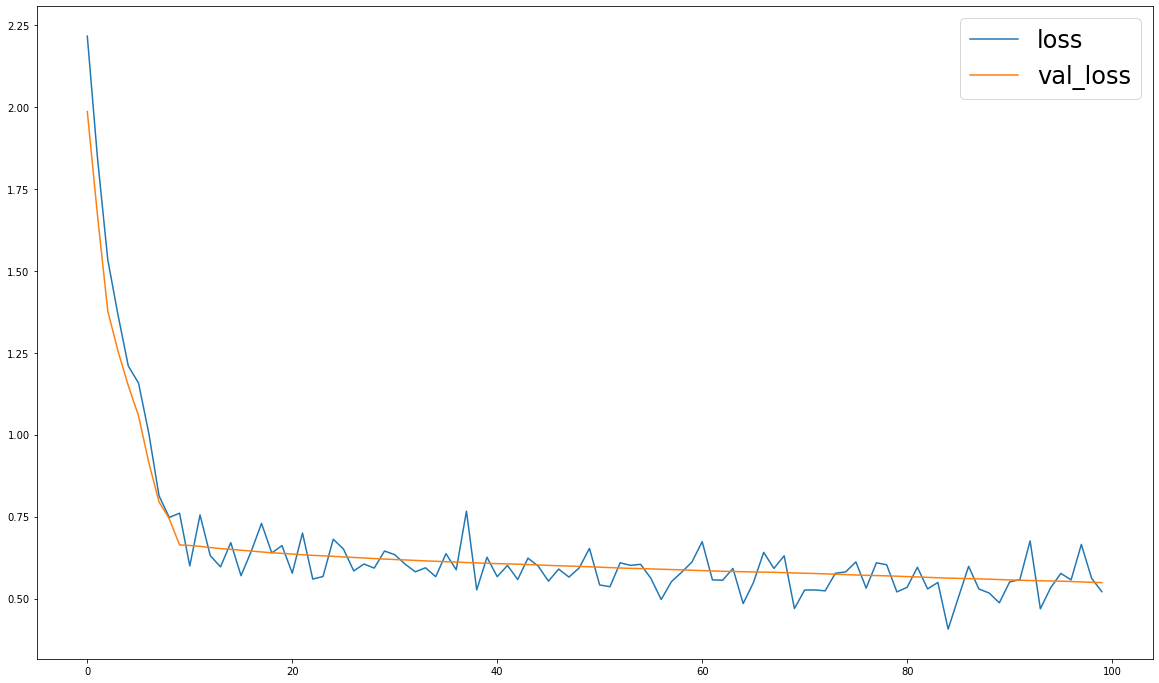

In [11]:
plt.figure(figsize=(20,12))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='upper right', prop={'size': 24})

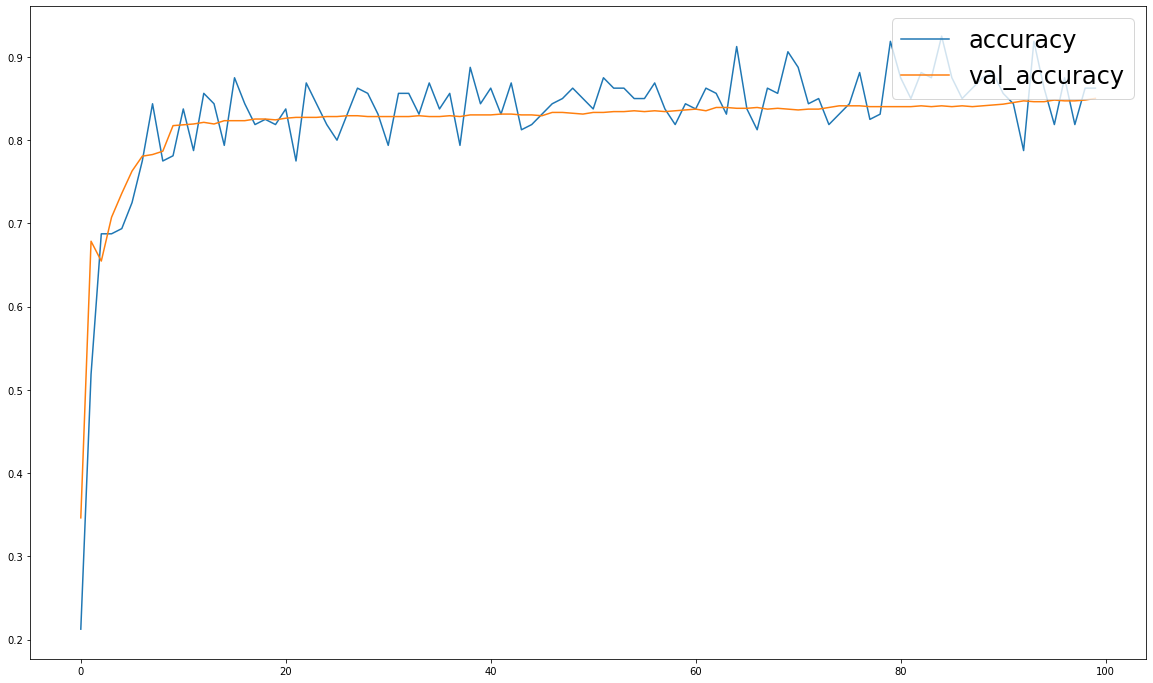

In [12]:
plt.figure(figsize=(20,12))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper right', prop={'size': 24});

In [13]:
scores = model.evaluate(x=x_valid, y=y_valid, batch_size=batch_size)

print(scores)

63/63 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.8502
[0.5491387248039246, 0.8501983880996704]


# With RELU Activation

In [14]:
model = construct_lenet5_model(activation='relu')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(16, 28, 28, 1)]         0         
_________________________________________________________________
C1 (Conv2D)                  (16, 28, 28, 6)           156       
_________________________________________________________________
S2 (AveragePooling2D)        (16, 14, 14, 6)           0         
_________________________________________________________________
C3 (Conv2D)                  (16, 10, 10, 16)          2416      
_________________________________________________________________
S4 (AveragePooling2D)        (16, 5, 5, 16)            0         
_________________________________________________________________
C5 (Conv2D)                  (16, 1, 1, 120)           48120     
_________________________________________________________________
flatten_1 (Flatten)          (16, 120)                 0   

In [15]:
checkpoint = ModelCheckpoint(filepath='lenet5_relu.h5',
                             monitor='val_accuracy', save_best_only = True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[ 'accuracy'])
history = model.fit(x= x_train, y= y_train
          , batch_size = batch_size
          , callbacks=[ learningRateScheduler, checkpoint]
          , epochs=number_of_epochs
          , steps_per_epoch = 10
          , validation_data = (x_valid, y_valid)
          )

Epoch 1/100
10/10 [==============================] - 1s 39ms/step - loss: 7.9085 - accuracy: 0.1360 - val_loss: 2.5691 - val_accuracy: 0.3413
Epoch 2/100
10/10 [==============================] - 0s 20ms/step - loss: 2.0502 - accuracy: 0.3787 - val_loss: 1.4679 - val_accuracy: 0.4821
Epoch 3/100
10/10 [==============================] - 0s 20ms/step - loss: 1.3447 - accuracy: 0.5565 - val_loss: 1.1930 - val_accuracy: 0.5982
Epoch 4/100
10/10 [==============================] - 0s 20ms/step - loss: 1.1719 - accuracy: 0.5504 - val_loss: 0.9925 - val_accuracy: 0.6954
Epoch 5/100
10/10 [==============================] - 0s 23ms/step - loss: 0.9621 - accuracy: 0.7310 - val_loss: 0.9753 - val_accuracy: 0.6994
Epoch 6/100
10/10 [==============================] - 0s 21ms/step - loss: 0.8294 - accuracy: 0.7483 - val_loss: 0.8960 - val_accuracy: 0.7153
Epoch 7/100
10/10 [==============================] - 0s 22ms/step - loss: 0.7521 - accuracy: 0.7139 - val_loss: 0.7844 - val_accuracy: 0.7431
Epoch 

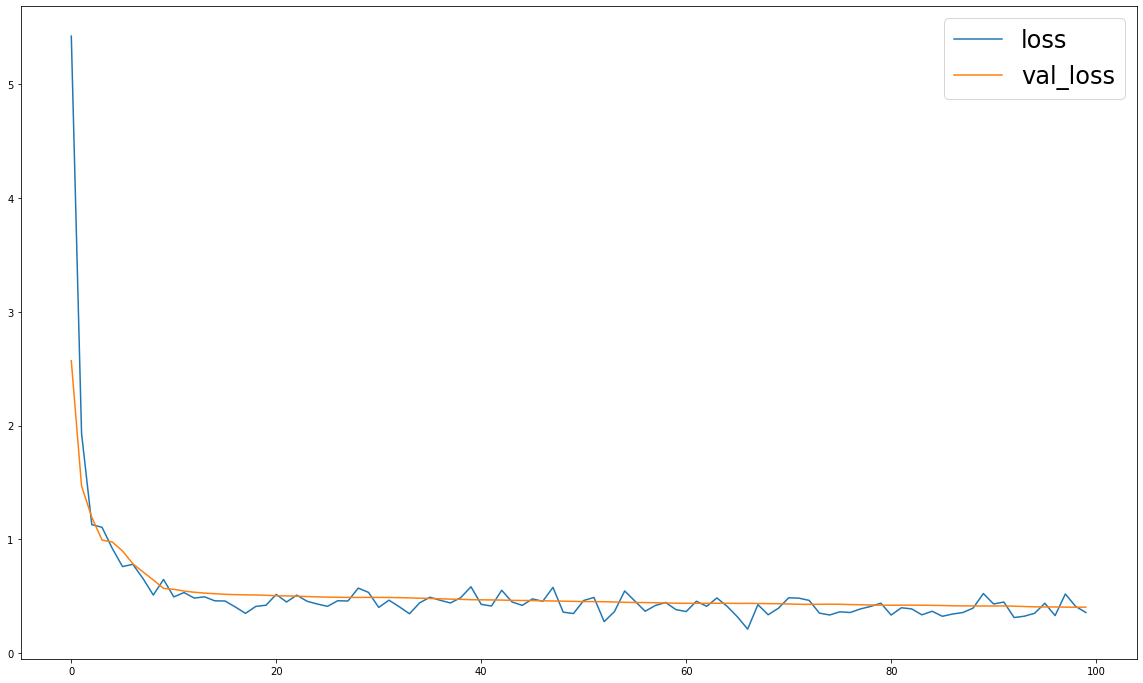

In [16]:
plt.figure(figsize=(20,12))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='upper right', prop={'size': 24})

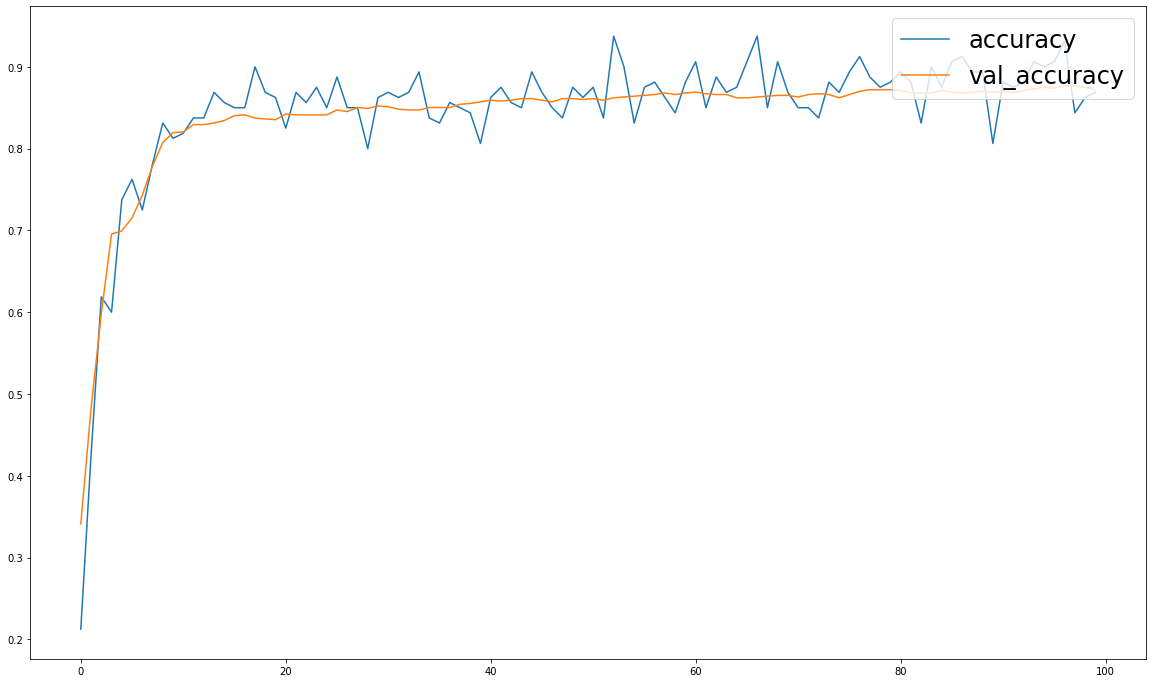

In [17]:
plt.figure(figsize=(20,12))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper right', prop={'size': 24});

In [18]:
scores = model.evaluate(x=x_valid, y=y_valid, batch_size=batch_size)

print(scores)

63/63 [==============================] - 0s 3ms/step - loss: 0.4030 - accuracy: 0.8720
[0.40300676226615906, 0.8720238208770752]
